In [12]:
import numpy as np 
import math
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import random
%matplotlib inline 

In [13]:
a = -3
b = 2
e = 0.0001

A3 = 1
A2 = 2
A1 = 2
A0 = 1

In [14]:
def func(x):
    return x**4 + A3*x**3 + A2*x**2 + A1*x + A0
    
def find_min(a, b, e):
    T = (3 - math.sqrt(5))/2

    x1 = a + T*(b - a)
    x2 = a + b - x1
    i = 0
    
    while True:
        if i == 0:
            f1 = func(x1)
            f2 = func(x2)
            i += 1
        if f1 <= f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
    
        l = b - a
        if l <= e:
            x_min = (a + b)/2
            break
    print('Минимум функции, равный {}, достигается при x, равном {}'.format(func(x_min),x_min))

In [15]:
find_min(-3, 2, 0.0001) 

Минимум функции, равный 0.42992864558656807, достигается при x, равном -0.5596276971233545


ПРОВЕРКА

In [16]:
lst_f = []
for x in np.arange(a, b, e):
    lst_f.append([x, func(x)])


min_p = min(lst_f, key=lambda t: t[1])
print(min_p)

[-0.55959999999485, 0.4299286465766661]


In [17]:
a = -3
b = 2

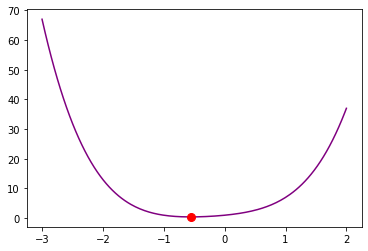

In [18]:
xnew = np.linspace(a, b, 200) 
ynew = [func(i) for i in xnew]

plt.plot(xnew, ynew, color='purple')

plt.plot(min_p[0], min_p[1], 'o', ms=8, color='r');


СЛУЧАЙ, КОГДА ОТРЕЗОК ЛОКАЛИЗАЦИИ УНИМОДАЛЬНОЙ ФУНКЦИИ НЕИЗВЕСТЕН

ДВУХЭТАПНАЯ ПРОЦЕДУРА ПОИСКА

In [19]:
A3 = 1
A2 = 2
A1 = 2
A0 = 1

ЭТАП 1

In [28]:
def func(x):
    return x**4 + A3*x**3 + A2*x**2 + A1*x + A0
    
def find_interval():
    delta = random.uniform(0, 5)
    x0 = random.uniform(-10, 10)
    f0 = func(x0)
    f1 = func(x0 + delta)

    if f0 > f1:
        a = x0
        x1 = x0 + delta
        f2 = f1
        k = 2
    else:
        f = func(x0 - delta)
        if f >= f0:
            a = x0 - delta 
            b = x0 + delta
            return [a, b] 
        else:
            b = x0
            x1 = x0 - delta
            f2 = f
            delta = -delta
            k = 2

    while True:
        x_k = x0 + 2 ** (k-1) * delta
        f_k = func(x_k)
        if f2 <= f_k:
            if delta > 0:
                b = x_k
            else:
                a = x_k
            break
        else:
            if delta > 0:
                a = x1
                k += 1
            else:
                b = x1
                k += 1
                
    print(f'Генерируемые точки и значения функции в них равны: f({x0})={f0}, f({x0 + delta})={f1}')
    print('Полученные границы интервала унимодальности функции:')
    return [a, b]
    

In [29]:
find_interval()

Генерируемые точки и значения функции в них равны: f(6.586495678339187)=2268.663150179397, f(4.588687168035452)=6228.386061876143
Полученные границы интервала унимодальности функции:


[-9.395972404090685, 4.588687168035452]

ЭТАП 2

In [22]:
e = 0.0001
a = find_interval()[0]
b = find_interval()[1]

Генерируемые точки и значения функции в них равны: f(5.2052672239578115)=940.7644178228793, f(1.1520654470618155)=8332.373955877127
Полученные границы отрезка локализации минимума унимодальной функции:


In [23]:
def find_min(a, b):
    
    T = (3 - math.sqrt(5))/2

    x1 = a + T*(b - a)
    x2 = a + b - x1

    n = 0
    d = {}
    i = 1

    while True:
        
        if n == 0:
            f1 = func(x1)
            f2 = func(x2)
            n += 1

        d[i] = [a, b, x1, x2, f1, f2]
        i += 1

        if f1 <= f2:
            b = x2
            x2 = x1
            x1 = a + b - x2
            f2 = f1
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            x2 = a + b - x1
            f1 = f2
            f2 = func(x2)
    
        l = b - a
        if l <= e:
            x_min = (a + b)/2
            break
    inf = pd.DataFrame.from_dict(d, orient='index', columns=['a', 'b', 'x1', 'x2', 'f(x1)', 'f(x2)'])
    fmin, xmin, it = func(x_min), x_min, inf.shape[0]   
    print(inf)
    print(f'Минимум функции, равный {fmin}, достигается при x, равном {xmin}. Количество итераций, обеспечившее получение требуемой точности равно {it}.')

    xnew = np.linspace(inf['a'].min(),inf['b'].max(), 200) 
    ynew = [func(i) for i in xnew]

    plt.plot(xnew, ynew, color='purple')

    plt.plot(xmin, fmin, 'o', ms=6, color='r')

    for i in range(1, len(inf)):
        x_values1 = [inf['a'][i], inf['a'][i]]
        x_values2 = [inf['b'][i], inf['b'][i]]
        y_values1 = [0, func(x_values1[0])]
        y_values2 = [0, func(x_values2[0])]
        plt.plot(x_values1, y_values1, color='orange')
        plt.plot(x_values2, y_values2, color='orange')
        
    plt.figure(figsize=(10, 15))

    

           a         b        x1        x2     f(x1)     f(x2)
1  -2.901136  2.162341 -0.967060  0.228265  0.906499  1.575348
2  -2.901136  0.228265 -1.705811 -0.967060  6.911298  0.906499
3  -1.705811  0.228265 -0.967060 -0.510487  0.906499  0.435099
4  -0.967060  0.228265 -0.510487 -0.228309  0.435099  0.638449
5  -0.967060 -0.228309 -0.684882 -0.510487  0.467130  0.435099
6  -0.684882 -0.228309 -0.510487 -0.402704  0.435099  0.479925
7  -0.684882 -0.402704 -0.577100 -0.510487  0.430607  0.435099
8  -0.684882 -0.510487 -0.618269 -0.577100  0.437758  0.430607
9  -0.618269 -0.510487 -0.577100 -0.551656  0.430607  0.430068
10 -0.577100 -0.510487 -0.551656 -0.535930  0.430068  0.431147
11 -0.577100 -0.535930 -0.561374 -0.551656  0.429935  0.430068
12 -0.577100 -0.551656 -0.567381 -0.561374  0.430062  0.429935
13 -0.567381 -0.551656 -0.561374 -0.557662  0.429935  0.429937
14 -0.567381 -0.557662 -0.563669 -0.561374  0.429965  0.429935
15 -0.563669 -0.557662 -0.561374 -0.559957  0.429935  0

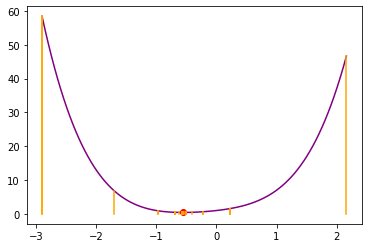

<Figure size 720x1080 with 0 Axes>

In [24]:
find_min(a, b) 